In [1]:
"""!pip install pymongo
!pip install requests
!pip install polars
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install h2o"""

'!pip install pymongo\n!pip install requests\n!pip install polars\n!pip install pandas\n!pip install matplotlib\n!pip install seaborn\n!pip install h2o'

In [2]:
import mondongo
import cleanfiles
import eda
import transforms
import dbSQL
import model

In [3]:
mondongo.upload_data()

Descargando CSV desde: https://media.githubusercontent.com/media/moonlightKiR/GTD/refs/heads/main/global_terrorism_data.csv...
CSV descargado correctamente.
Transformando CSV a JSON (Streaming)...
Archivo JSON creado correctamente.
Borrando coleccion existente...
Conectado a MongoDB.
Subiendo registros...
   - 5000 registros subidos...
   - 10000 registros subidos...
   - 15000 registros subidos...
   - 20000 registros subidos...
   - 25000 registros subidos...
   - 30000 registros subidos...
   - 35000 registros subidos...
   - 40000 registros subidos...
   - 45000 registros subidos...
   - 50000 registros subidos...
   - 55000 registros subidos...
   - 60000 registros subidos...
   - 65000 registros subidos...
   - 70000 registros subidos...
   - 75000 registros subidos...
   - 80000 registros subidos...
   - 85000 registros subidos...
   - 90000 registros subidos...
   - 95000 registros subidos...
   - 100000 registros subidos...
   - 105000 registros subidos...
   - 110000 registro

In [4]:
cleanfiles.clean_files()

In [5]:
df = eda.get_dataframe()

Conectando a MongoDB para extraer datos...
DataFrame creado con exito: 181691 filas y 136 columnas.


Analizando calidad del dato (Nulos y Vacios)...

Se han detectado 106 columnas con datos faltantes.
Top 100 variables con mas nulos/vacios:
 - gsubname3: 181671 faltantes (99.99%)
 - weapsubtype4: 181621 faltantes (99.96%)
 - weapsubtype4_txt: 181621 faltantes (99.96%)
 - weaptype4: 181618 faltantes (99.96%)
 - weaptype4_txt: 181618 faltantes (99.96%)
 - claimmode3: 181558 faltantes (99.93%)
 - claimmode3_txt: 181558 faltantes (99.93%)
 - gsubname2: 181531 faltantes (99.91%)
 - claim3: 181373 faltantes (99.82%)
 - guncertain3: 181371 faltantes (99.82%)
 - gname3: 181367 faltantes (99.82%)
 - divert: 181367 faltantes (99.82%)
 - attacktype3: 181263 faltantes (99.76%)
 - attacktype3_txt: 181263 faltantes (99.76%)
 - ransomnote: 181177 faltantes (99.72%)
 - ransompaidus: 181139 faltantes (99.70%)
 - ransomamtus: 181128 faltantes (99.69%)
 - claimmode2: 181075 faltantes (99.66%)
 - claimmode2_txt: 181075 faltantes (99.66%)
 - ransompaid: 180917 faltantes (99.57%)
 - corp3: 180665 faltantes

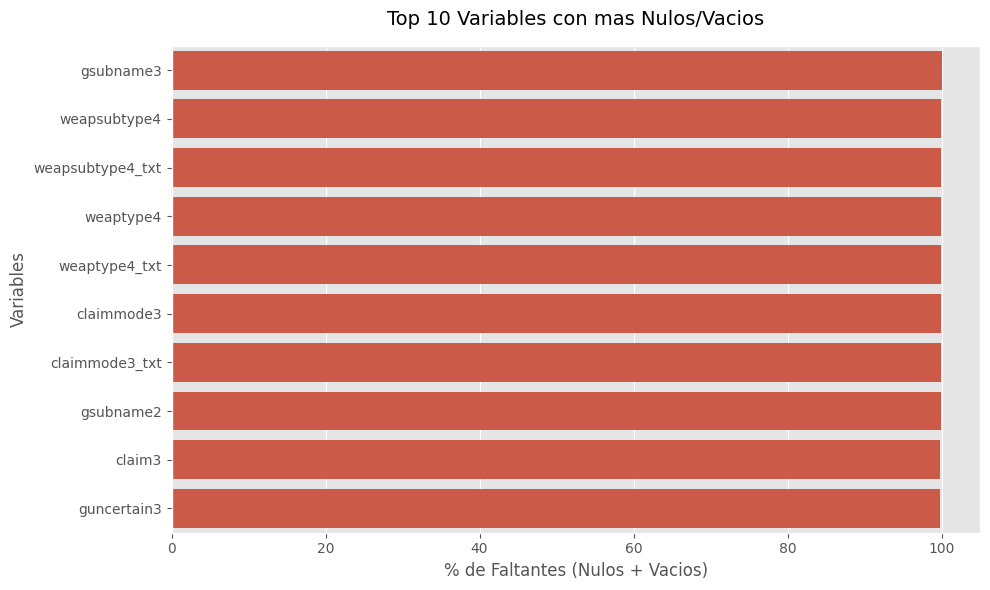

In [6]:
missing_col = eda.analyze_data_quality(df)

In [7]:
missing_col

['gsubname3',
 'weapsubtype4',
 'weapsubtype4_txt',
 'weaptype4',
 'weaptype4_txt',
 'claimmode3',
 'claimmode3_txt',
 'gsubname2',
 'claim3',
 'guncertain3',
 'gname3',
 'divert',
 'attacktype3',
 'attacktype3_txt',
 'ransomnote',
 'ransompaidus',
 'ransomamtus',
 'claimmode2',
 'claimmode2_txt',
 'ransompaid',
 'corp3',
 'targsubtype3',
 'targsubtype3_txt',
 'natlty3',
 'natlty3_txt',
 'target3',
 'targtype3',
 'targtype3_txt',
 'ransomamt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype3',
 'weaptype3_txt',
 'claim2',
 'guncertain2',
 'gname2',
 'resolution',
 'kidhijcountry',
 'nhours',
 'compclaim',
 'gsubname',
 'attacktype2',
 'attacktype2_txt',
 'ndays',
 'approxdate',
 'corp2',
 'nreleased',
 'targsubtype2',
 'targsubtype2_txt',
 'natlty2',
 'natlty2_txt',
 'hostkidoutcome',
 'hostkidoutcome_txt',
 'target2',
 'targtype2',
 'targtype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype2',
 'weaptype2_txt',
 'nhostkidus',
 'nhostkid',
 'claimmode',
 'claimmode_txt',
 'rela

Todas esas columnas tienen un dato vacío o algún nulo

In [8]:
eda.check_duplicates(df)

Analizando duplicados...
Analisis de duplicados en 'eventid': 0 encontrados.


0

No hay ningún valor duplicado

In [9]:
df.describe()

statistic,_id,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,…,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""",…,"""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",…,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""698bb04458b62fe2fb0875c4""","""197000000001""","""1970""","""0""","""0""","""""","""0""","""""","""10""","""Afghanistan""","""1""","""Australasia & Oceania""","""""","""""","""""","""""","""""","""-9""","""""","""""","""0""","""0""","""0""","""""","""""","""""","""""","""0""","""0""","""1""","""Armed Assault""","""""","""""","""""","""""","""1""",…,"""""","""""","""""","""""","""""","""""","""-9""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""Anti-Abortion Project 2010""","""-9""","""-9""","""-9""","""-9""",""""""
"""25%

Una parte importante de esto es que las fechas estén completas

Analizando las columnas y su contenido vemos que realmente solo tenemos unas 35 columnas útiles

In [10]:
df_clean = eda.run_lazy_pipeline(df)

Iniciando Pipeline Lazy (Optimización de Polars)...
Ejecutando plan optimizado con .collect()...
Procesamiento Lazy finalizado: 180800 registros válidos conservados.


In [11]:
display(df_clean.null_count())

eventid,nkill,nwound,success,propvalue,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,gname,gsubname,attacktype1_txt,suicide,targtype1_txt,corp1,target1,weaptype1_txt,weapsubtype1_txt
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_clean.schema

Schema([('eventid', String),
        ('nkill', Int64),
        ('nwound', Int64),
        ('success', Int64),
        ('propvalue', Float64),
        ('iyear', Int64),
        ('imonth', Int64),
        ('iday', Int64),
        ('country_txt', String),
        ('region_txt', String),
        ('provstate', String),
        ('city', String),
        ('latitude', Float64),
        ('longitude', Float64),
        ('gname', String),
        ('gsubname', String),
        ('attacktype1_txt', String),
        ('suicide', String),
        ('targtype1_txt', String),
        ('corp1', String),
        ('target1', String),
        ('weaptype1_txt', String),
        ('weapsubtype1_txt', String)])

Aquí procederemos a modificar el tipo de variable de unas columnas específicas, para que en lugar de estar en string, sean números

In [13]:
df_clean.schema

Schema([('eventid', String),
        ('nkill', Int64),
        ('nwound', Int64),
        ('success', Int64),
        ('propvalue', Float64),
        ('iyear', Int64),
        ('imonth', Int64),
        ('iday', Int64),
        ('country_txt', String),
        ('region_txt', String),
        ('provstate', String),
        ('city', String),
        ('latitude', Float64),
        ('longitude', Float64),
        ('gname', String),
        ('gsubname', String),
        ('attacktype1_txt', String),
        ('suicide', String),
        ('targtype1_txt', String),
        ('corp1', String),
        ('target1', String),
        ('weaptype1_txt', String),
        ('weapsubtype1_txt', String)])

Y ahora procederemos con el mapeo de las columnas categóricas.

In [14]:
eda.list_categorical_uniques(df_clean)

Buscando valores únicos en columnas de texto...

Columna String: 'eventid'
  Total únicos: 180800
  Valores (Top 15): ['198308130004', '200609180017', '201611200055', '201402040027', '199705280005', '201204190043', '201008110005', '199701140006', '198611120002', '200812100003', '201605060009', '198409200003', '201609200014', '201101100004', '201310120038']...

Columna String: 'country_txt'
  Total únicos: 205
  Valores (Top 15): ['Kuwait', 'Mauritania', 'Denmark', 'United Arab Emirates', 'Chile', 'Turkmenistan', 'Philippines', 'International', 'Kosovo', 'Spain', 'Zambia', 'Burundi', 'Somalia', 'Iran', 'Germany']...

Columna String: 'region_txt'
  Total únicos: 12
  Valores: ['Central America & Caribbean', 'Middle East & North Africa', 'Western Europe', 'Sub-Saharan Africa', 'Central Asia', 'Australasia & Oceania', 'Southeast Asia', 'South America', 'Eastern Europe', 'East Asia', 'North America', 'South Asia']

Columna String: 'provstate'
  Total únicos: 2841
  Valores (Top 15): ['Belgr

{'eventid': ['198308130004',
  '200609180017',
  '201611200055',
  '201402040027',
  '199705280005',
  '201204190043',
  '201008110005',
  '199701140006',
  '198611120002',
  '200812100003',
  '201605060009',
  '198409200003',
  '201609200014',
  '201101100004',
  '201310120038',
  '199403180002',
  '201504300073',
  '201602270013',
  '201605090012',
  '197801230001',
  '201405070065',
  '201504210092',
  '201601110034',
  '201310040029',
  '201503300017',
  '201712270014',
  '201108080002',
  '200811090005',
  '201408060050',
  '198503140006',
  '199407210008',
  '201309200003',
  '198909090021',
  '201512070039',
  '201701300017',
  '201310220009',
  '199004100001',
  '199708290003',
  '198502110008',
  '201312020027',
  '201209210021',
  '201005130020',
  '201104200011',
  '198909090018',
  '201402280047',
  '201203090006',
  '201603300012',
  '199604170007',
  '199710090001',
  '201702270061',
  '201710090026',
  '201302250023',
  '201404150063',
  '201506200023',
  '201605270020',

Antes de enviar los datos a hacer los modelos, procederemos a guardarlos en una base de datos sql de SQLite

Como hemos eliminado el eventid deberemos volver a añadirlo.

In [15]:
if "eventid" not in df_clean.columns:
    df_clean = df_clean.with_columns(df.select("eventid"))

Una vez añadido, podemos subir el dataframe para almacenarlo a modo data wharehouse

In [16]:
dbSQL.ejecutar_pipeline_sql(df_clean)


Iniciando SQL Pipeline en: data/terrorismo_gtd.db
Directorio creado: data
Base de datos limpia.
Procesando dimensión: id_tiempo...
Procesando dimensión: id_ubicacion...
Procesando dimensión: id_grupo...
Procesando dimensión: id_metodo...
Procesando dimensión: id_objetivo...
Procesando Armas y Puente...
Hechos insertados: 180800


Recién añadidos los datos, usaremos una función para extraerlos ya como dataframe de la base de datos.

In [17]:
df_sql = dbSQL.extraer_dataframe_analitico()

Extrayendo datos de: data/terrorismo_gtd.db...
Extracción completada: 180800 filas recuperadas.


Con esas columnas que sabemos que son tipo string, vamos a codificarlas a numérico conservando el mapeo.

In [18]:
df_num, mis_mapeos = eda.encode_categorical_columns(df_sql)

Codificando columnas detectadas como texto: ['country_txt', 'region_txt', 'provstate', 'city', 'gname', 'gsubname', 'attacktype1_txt', 'targtype1_txt', 'corp1', 'target1', 'weaptype1_txt', 'weapsubtype1_txt']...
 - 'country_txt' codificado (205 categorías).
 - 'region_txt' codificado (12 categorías).
 - 'provstate' codificado (2842 categorías).
 - 'city' codificado (36551 categorías).
 - 'gname' codificado (3517 categorías).
 - 'gsubname' codificado (1177 categorías).
 - 'attacktype1_txt' codificado (9 categorías).
 - 'targtype1_txt' codificado (22 categorías).
 - 'corp1' codificado (33081 categorías).
 - 'target1' codificado (85406 categorías).
 - 'weaptype1_txt' codificado (12 categorías).
 - 'weapsubtype1_txt' codificado (31 categorías).


Para poder trabajar con h2o, este solo acepta dataframes de pandas, por lo tanto creamos una funcion para convertir el dataframe de polars a pandas.

In [19]:
df_pandas = transforms.convert_to_pandas(df_num)

Iniciando conversión de Polars a Pandas...
Conversión exitosa. DataFrame de Pandas listo con 180800 registros.


In [20]:
df_pandas

,eventid,nkill,nwound,success,propvalue,iyear,imonth,iday,country_txt,region_txt,...,longitude,gname,gsubname,attacktype1_txt,suicide,targtype1_txt,corp1,target1,weaptype1_txt,weapsubtype1_txt
0,197000000001,1,0,1,0.0,1970,7,2,76,3,...,-69.951164,3247,NaN,6,0,11,NaN,45286.0,4,NaN
1,197001010002,0,0,1,0.0,1970,1,1,66,11,...,-89.176269,1142,NaN,0,0,13,2461.0,82479.0,1,4.0
2,197001020001,0,0,0,0.0,1970,1,2,57,5,...,-56.187214,3036,NaN,6,0,13,16685.0,24179.0,1,11.0
3,197001020002,0,0,1,22500.0,1970,1,2,66,11,...,-122.225906,2206,NaN,7,0,3,3168.0,83042.0,10,25.0
4,197001020003,0,0,1,60000.0,1970,1,2,66,11,...,-89.412488,2655,NaN,5,0,20,16011.0,40176.0,9,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180795,201712310022,1,2,1,0.0,2017,12,31,121,10,...,45.385034,2947,NaN,0,0,20,22556.0,66028.0,1,4.0
180796,201712310029,2,7,1,-99.0,2017,12,31,22,9,...,35.942679,1385,NaN,7,0,20,25617.0,16710.0,10,0.0
180797,201712310030,0,0,1,-99.0,2017,12,31,160,1,...,124.437908,2461,NaN,5,0,11,21862.0,24833.0,9,15.0
180798,201712310031,0,0,0,0.0,2017,12,31,183,0,...,93.940430,2206,NaN,7,0,9,3792.0,81269.0,10,30.0


Seguidamente de haber realizado este eda, haremos

Aquí obteniendo nuestro dataframe en pandas, ya que si lo hacemos con polars, este no funciona porque h2o no acepta dataframes en polars.

In [21]:
hf = model.init(df_pandas)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "23.0.2" 2025-01-21; Java(TM) SE Runtime Environment (build 23.0.2+7-58); Java HotSpot(TM) 64-Bit Server VM (build 23.0.2+7-58, mixed mode, sharing)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/w2/d79hqs192f71qyyzr9n9rkrm0000gn/T/tmpqer3cb6b
  JVM stdout: /var/folders/w2/d79hqs192f71qyyzr9n9rkrm0000gn/T/tmpqer3cb6b/h2o_guille_started_from_python.out
  JVM stderr: /var/folders/w2/d79hqs192f71qyyzr9n9rkrm0000gn/T/tmpqer3cb6b/h2o_guille_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,2 months and 17 days
H2O_cluster_name:,H2O_from_python_guille_l0uxs6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.484 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [22]:
predictors, classification_target, regression_target, hf = model.split_data(hf)

In [23]:
train,test = model.divide_data(hf)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Accuracy (default threshold): 0.9337
Accuracy (threshold max F1): 0.9331
AUC: 0.9226
F1: [[0.7998465597317626, 0.96329508321301]]
Confusion Matrix:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7998465597317626
       0     1      Error    Rate
-----  ----  -----  -------  ----------------
0      2001  2008   0.5009   (2008.0/4009.0)
1      407   31690  0.0127   (407.0/32097.0)
Total  2408  33698  0.0669   (2415.0/36106.0)

--- Generando Visualizaciones de H2O ---
Graficando Importancia de Variables...


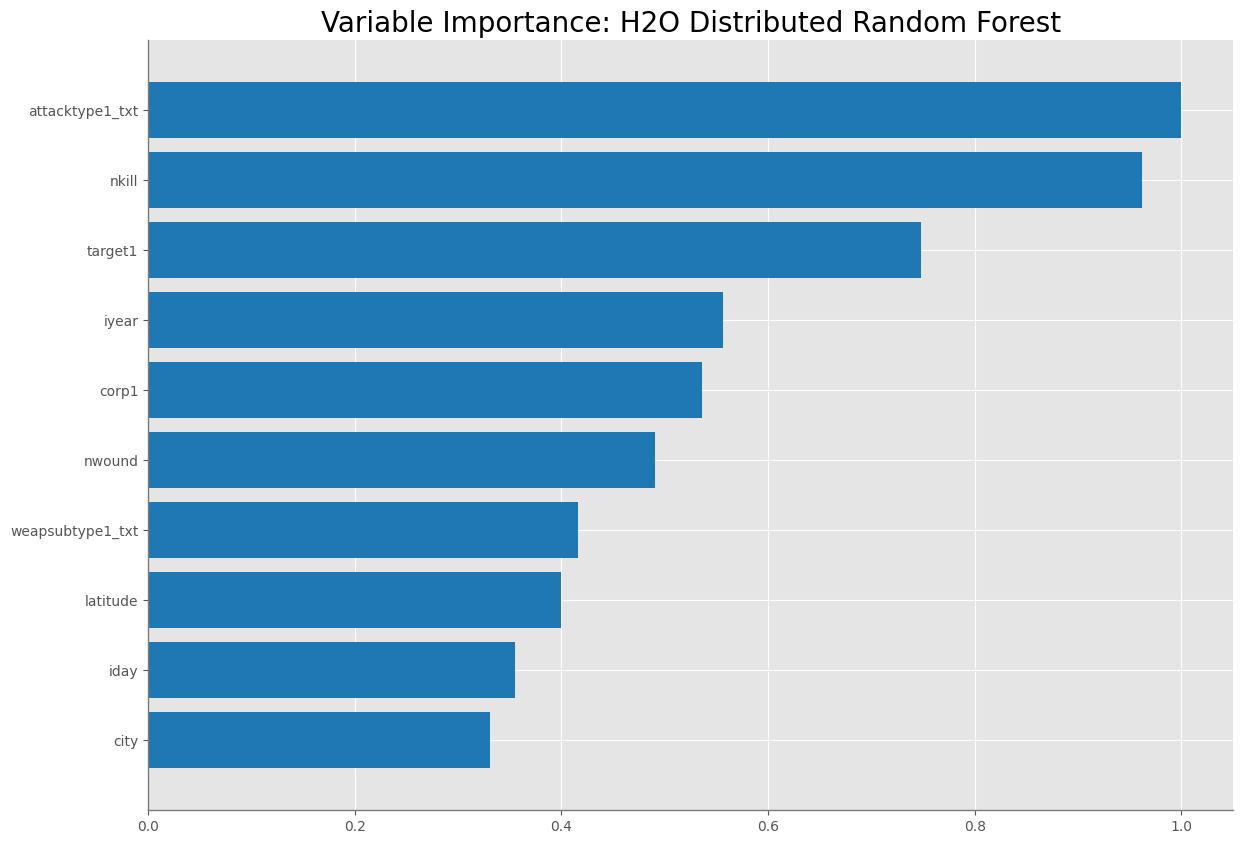

Graficando Curva ROC...


<Figure size 640x480 with 0 Axes>

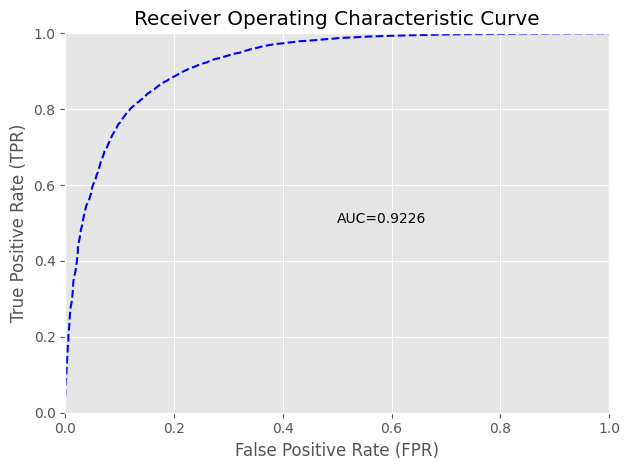

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1770762325483_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          5.63485e+06            20           20           20            7072          10052         8707.52

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.10318509571613067
RMSE: 0.3212243697419775
LogLoss: 0.30288738224459144
Mean Per-Class Error: 0.02054888919817944
AUC: 0.9966926351462254
AUCPR: 0.9973674264662251
Gini: 0.9933852702924508

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.860219216126352
       0       1       Error    Rate
-----  ------  ------  -------  -----------------
0      127006  1706    0.0133   (1706.0/128712.0)
1      3584    125136  0.0278   (3584.0/128720.0)
Total  130590  126842  0.0205   (5290.0/257432.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.860219     0.979301  77
max f2                       0.809653     0.980546  94
max f0point5                 0.890667     0.987013  67
max accuracy                 0.860219     0.979451  77
max precision                0.999964     1         0
max recall                   0.0156228    1         394
max specificity              0.999964     1         0
max absolute_mcc             0.860219     0.959004  77
max min_per_class_accuracy   0.843543     0.977657  83
max mean_per_class_accuracy  0.860219     0.979451  77
max tns                      0.999964     128712    0
max fns                      0.999964     111624    0
max fps                      0.000108231  128712    399
max tps                      0.0156228    128720    394
max tnr                      0.999964     1         0
max fnr                      0.999964     0.867185  0
max fpr                      0.000108231  1         399
max tpr                      0.0156228    1         394

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 67.33 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.055603                    1                  1.99994     1.99994            1                1          1                           1                   0.111203        0.111203                   99.9938   99.9938            0.111203
2        0.100003                    0.998229           1.99994     1.99994            1                0.9992     1                           0.999645            0.0887974       0.2                        99.9938   99.9938            0.2
3        0.150001                    0.994933           1.99994     1.99994            1                0.996693   1                           0.998661            0.0999922       0.299992                   99.9938   99.9938            0.299992
4        0.200942                    0.991794           1.99994     1.99994            1                0.993304   1                           0.997303            0.10188         0.401872                   99.9938   99.9938            0.401872
5        0.300002                    0.982062           1.99994     1.99994            1                0.987388   1   

In [24]:
model.classify_h2o(train, test, predictors, classification_target)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
R^2: 0.5852
RMSE: 3.6763
MAE: 2.4876

--- Generando Visualizaciones de H2O ---
Graficando Importancia de Variables...


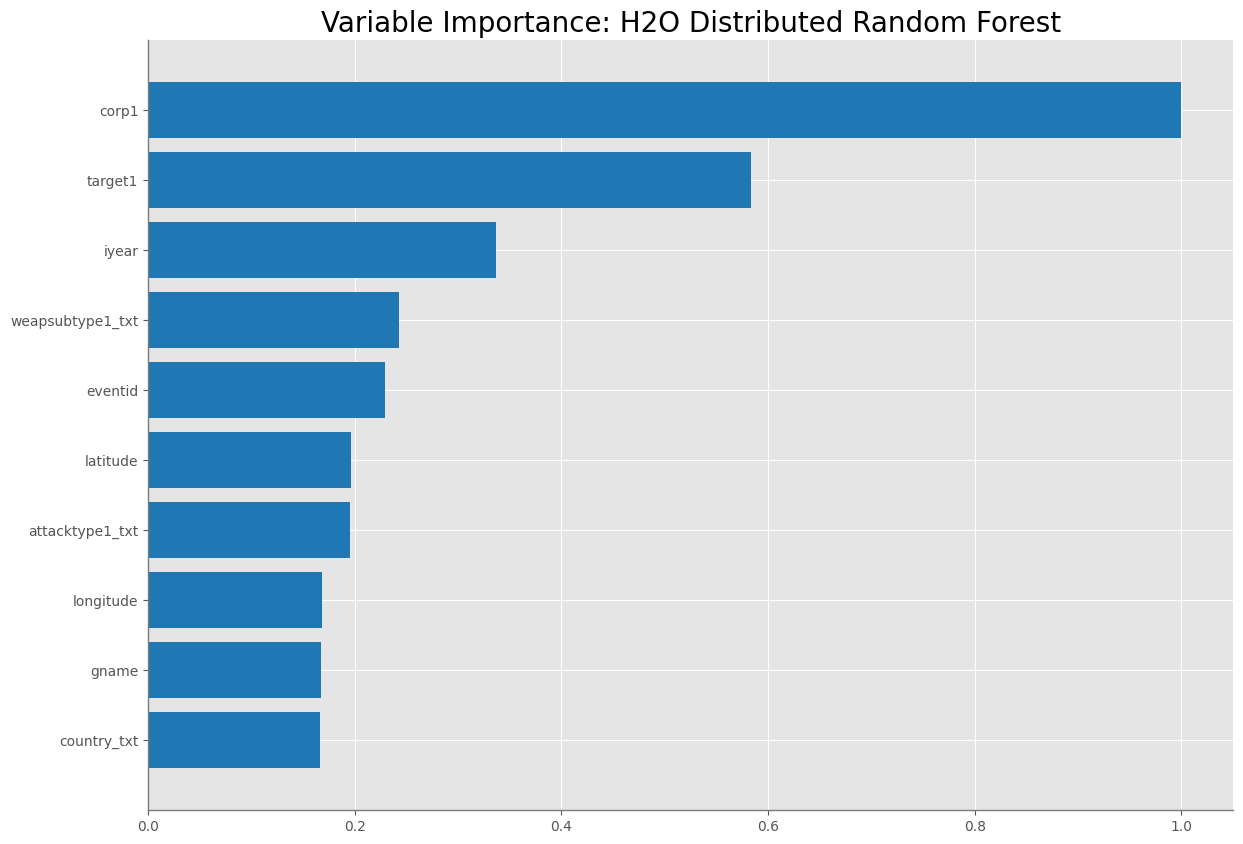

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1770762325483_12


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          1.38073e+07            20           20           20            17858         22265         20346.3

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 13.98512259976716
RMSE: 3.7396687820938315
MAE: 2.5355721639101283
RMSLE: 0.5357521521001933
Mean Residual Deviance: 13.98512259976716

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2026-02-10 23:25:43  0.095 sec   0                  nan              nan             nan
    2026-02-10 23:25:43  0.518 sec   1                  4.88403          2.92875         23.8538
    2026-02-10 23:25:44  0.955 sec   2                  4.87557          3.01762         23.7712
    2026-02-10 23:25:44  1.352 sec   3                  4.81912          3.04477         23.224
    2026-02-10 23:25:44  1.641 sec   4                  4.70993          3.02086         22.1835
    2026-02-10 23:25:45  1.958 sec   5                  4.59929          2.98113         21.1535
    2026-02-10 23:25:45  2.277 sec   6                  4.50419          2.94088         20.2877
    2026-02-10 23:25:45  2.605 sec   7                  4.40258          2.89543         19.3827
    2026-02-10 23:25:46  2.968 sec   8                  4.33082          2.86699         18.756
    2026-02-10 23:25:46  3.296 sec   9                  4.25007          2.82175         18.0631
    2026-02-10 23:25:46  3.594 sec   10                 4.18285          2.78598         17.4963
    2026-02-10 23:25:47  3.868 sec   11                 4.13623          2.76771         17.1084
    2026-02-10 23:25:51  7.926 sec   24                 3.84132          2.59923         14.7558
    2026-02-10 23:25:55  12.022 sec  37                 3.77428          2.55826         14.2452
    2026-02-10 23:25:59  15.813 sec  50                 3.73967          2.53557         13.9851

Variable Importances: 
variable          relative_importance    scaled_importance     percentage
----------------  ---------------------  --------------------  ---------------------
corp1             29335140.0             1.0                   0.2320611403272294
target1           17119290.0             0.5835762161012356    0.13542536217630238
iyear             9871067.0              0.33649292282225346   0.07808693138217453
weapsubtype1_txt  7132966.5              0.24315433640337153   0.05642667258127714
eventid           6722338.0              0.2291564996792243    0.053178318628957166
latitude          5748677.0              0.19596555530329837   0.04547599022854216
attacktype1_txt   5735746.5              0.1955247699516689    0.04537370107720348
longitude         4946236.0              0.16861129689512305   0.039128129829535285
gname             4911431.0              0.16742483587942653   0.03885279833327895
country_txt       4885224.5              0.1665314874924749    0.03864548688789347
---               ---                    ---                   ---
iday              4347321.0              0.14819499753537907   0.03439030011885102
city              4240700.0              0.14456041457446597   0.03354685465232761
imonth            3801564.5              0.12959080815704305   0.030072990716850632
weaptype1_txt     3221047.25             0.10980166619283221   0.025480699866538437
nkill             2914454.0              0.09935026729035552   0.023055336319214942
region_txt   

<Figure size 640x480 with 0 Axes>

In [25]:
model.regression_h2o(train, test, predictors, regression_target)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
R²: 0.48713748411604496
MSE: 0.05062239652725067
RMSE: 0.22499421443061746

--- Generando Visualizaciones de H2O ---
Graficando Importancia de Variables...


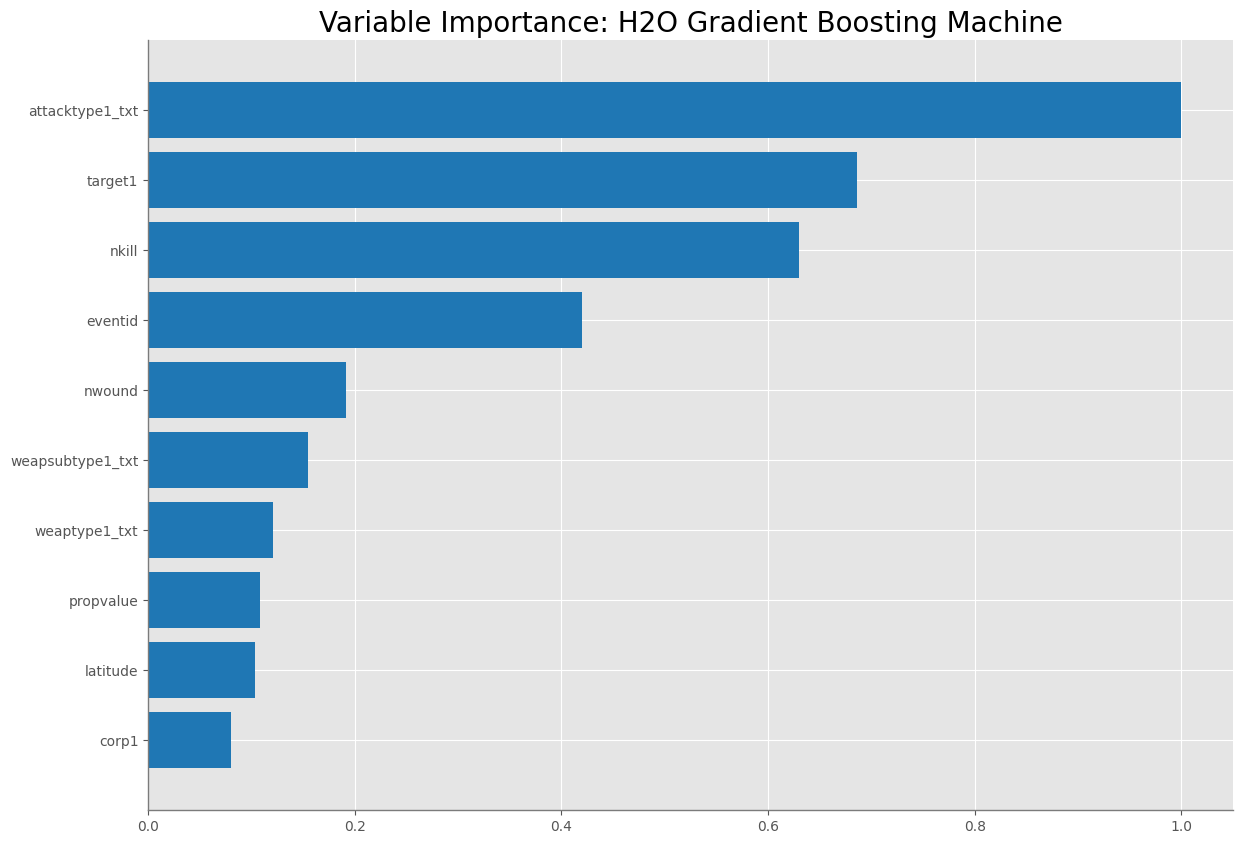

Graficando Curva ROC...


<Figure size 640x480 with 0 Axes>

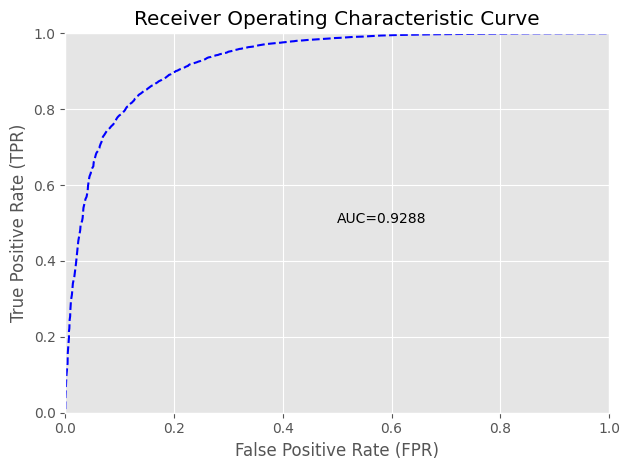

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1770762325483_13


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    200                200                         87615                  5            5            5             16            32            28.845

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.04623698460646926
RMSE: 0.21502786937155208
LogLoss: 0.16524452446346058
Mean Per-Class Error: 0.20512242333972944
AUC: 0.9441643252459735
AUCPR: 0.9914222729825718
Gini: 0.888328650491947

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6053711164324886
       0      1       Error    Rate
-----  -----  ------  -------  -----------------
0      9696   6278    0.393    (6278.0/15974.0)
1      2218   126502  0.0172   (2218.0/128720.0)
Total  11914  132780  0.0587   (8496.0/144694.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.605371     0.967511  232
max f2                       0.27168      0.982008  319
max f0point5                 0.787183     0.965528  166
max accuracy                 0.63603      0.94147   222
max precision                0.999162     1         0
max recall                   0.0401136    1         390
max specificity              0.999162     1         0
max absolute_mcc             0.674544     0.684511  209
max min_per_class_accuracy   0.883537     0.869282  116
max mean_per_class_accuracy  0.86681      0.87037   126
max tns                      0.999162     15974     0
max fns                      0.999162     127958    0
max fps                      0.00929282   15974     399
max tps                      0.0401136    128720    390
max tnr                      0.999162     1         0
max fnr                      0.999162     0.99408   0
max fpr                      0.00929282   1         399
max tpr                      0.0401136    1         390

Gains/Lift Table: Avg response rate: 88.96 %, avg score: 88.96 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100004                   0.998626           1.1241    1.1241             1                0.999     1                           0.999               0.0112415       0.0112415                  12.4099   12.4099            0.0112415
2        0.0200008                   0.998134           1.1241    1.1241             1                0.998367  1                           0.998684            0.0112415       0.0224829                  12.4099   12.4099            0.0224829
3        0.0300012                   0.997695           1.1241    1.1241             1                0.997913  1                           0.998427            0.0112415       0.0337244                  12.4099   12.4099            0.0337244
4        0.0400017                   0.997327           1.1241    1.1241             1                0.997514  1                           0.998199            0.0112415       0.0449658                  12.4099   12.4099            0.0449658
5        0.0500021                   0.996936           1.12255   1.12379            0.998618         0.997135  0.999724  

In [26]:
model.gradientBoost_h2o(train, test, predictors, classification_target)
